In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('CO22339soiLMEASURES.csv')
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       5000 non-null   int64  
 1   P       5000 non-null   int64  
 2   K       5000 non-null   int64  
 3   ph      5000 non-null   float64
 4   crop    5000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 195.4+ KB


In [ ]:
dataset.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()
y = Labelencoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

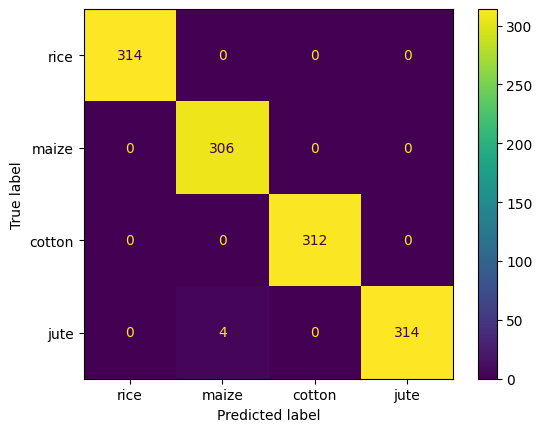

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred))
print("The precision score is:", precision_score(y_test, y_pred, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred, average='macro'))

The accuracy score is: 0.9968
The precision score is: 0.9967741935483871
The recall score is: 0.9968553459119497
The f1_score score is: 0.9967943448956107


SVM

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel='linear', random_state=0 )
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_svc = classifier_svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

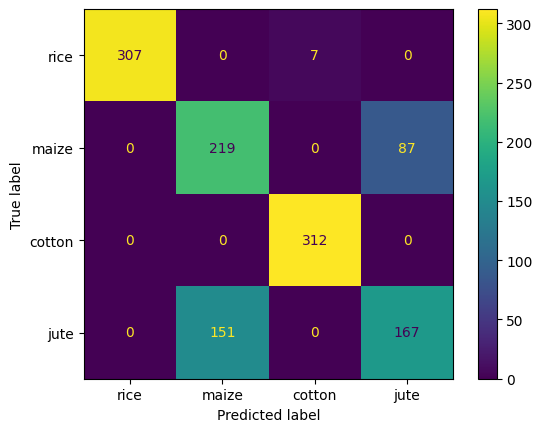

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_svc))
print("The precision score is:", precision_score(y_test, y_pred_svc, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_svc, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_svc, average='macro'))

The accuracy score is: 0.804
The precision score is: 0.8068571582962026
The recall score is: 0.8046376283959082
The f1_score score is: 0.8023698584787051


Kernel SVM

In [ ]:
from sklearn.svm import SVR
classifier_svr = SVC(kernel='rbf', random_state=0)
classifier_svr.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred_svr = classifier_svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svr = confusion_matrix(y_test, y_pred_svr)

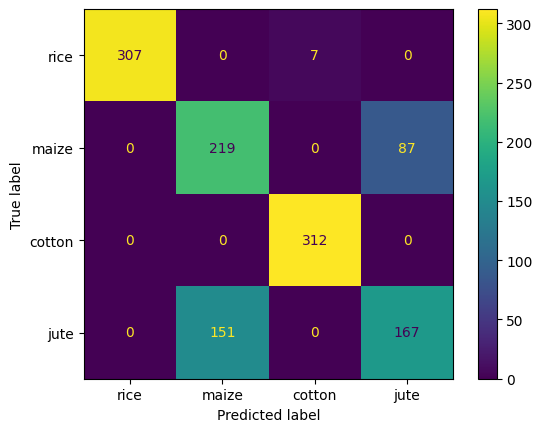

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svr, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_svr))
print("The precision score is:", precision_score(y_test, y_pred_svr, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_svr, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_svr, average='macro'))

The accuracy score is: 0.804
The precision score is: 0.8068571582962026
The recall score is: 0.8046376283959082
The f1_score score is: 0.8023698584787051


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

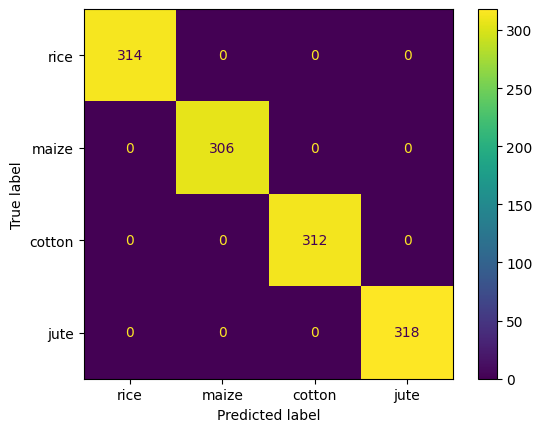

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_dt))
print("The precision score is:", precision_score(y_test, y_pred_dt, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_dt, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_dt, average='macro'))

The accuracy score is: 1.0
The precision score is: 1.0
The recall score is: 1.0
The f1_score score is: 1.0


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

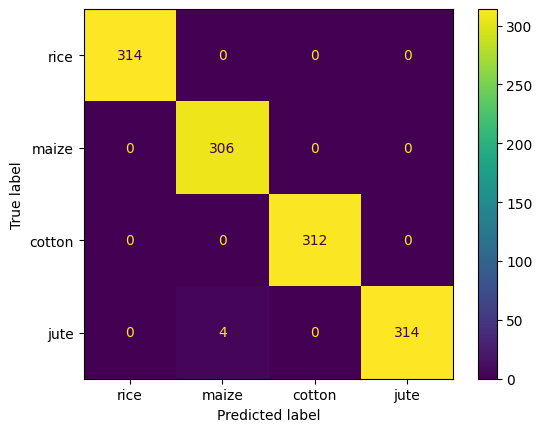

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_rf))
print("The precision score is:", precision_score(y_test, y_pred_rf, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_rf, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_rf, average='macro'))

The accuracy score is: 0.9968
The precision score is: 0.9967741935483871
The recall score is: 0.9968553459119497
The f1_score score is: 0.9967943448956107


NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

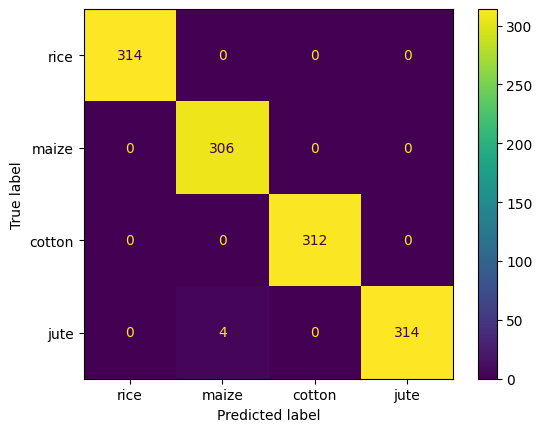

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_nb))
print("The precision score is:", precision_score(y_test, y_pred_nb, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_nb, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_nb, average='macro'))

The accuracy score is: 0.9968
The precision score is: 0.9967741935483871
The recall score is: 0.9968553459119497
The f1_score score is: 0.9967943448956107


In [ ]:
results = {
    'Model': ['KNN', 'SVM', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred),
                 accuracy_score(y_test, y_pred_svr),
                 accuracy_score(y_test, y_pred_svc),
                 accuracy_score(y_test, y_pred_nb),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred, average='macro'),
                  precision_score(y_test, y_pred_svr, average='macro'),
                  precision_score(y_test, y_pred_svc, average='macro'),
                  precision_score(y_test, y_pred_nb, average='macro'),
                  precision_score(y_test, y_pred_dt, average='macro'),
                  precision_score(y_test, y_pred_rf, average='macro')],
    'Recall': [recall_score(y_test, y_pred, average='macro'),
              recall_score(y_test, y_pred_svr, average='macro'),
              recall_score(y_test, y_pred_svc, average='macro'),
              recall_score(y_test, y_pred_nb, average='macro'),
              recall_score(y_test, y_pred_dt, average='macro'),
              recall_score(y_test, y_pred_rf, average='macro')],
    'F1-Score': [f1_score(y_test, y_pred, average='macro'),
                f1_score(y_test, y_pred_svr, average='macro'),
                f1_score(y_test, y_pred_svc, average='macro'),
                f1_score(y_test, y_pred_nb, average='macro'),
                f1_score(y_test, y_pred_dt, average='macro'),
                f1_score(y_test, y_pred_rf, average='macro')]
}

df = pd.DataFrame(results)
print("Model Comparison Table")
display(df)

Model Comparison Table


,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.9968,0.996774,0.996855,0.996794
1,SVM,0.8040,0.806857,0.804638,0.802370
2,Kernel SVM,0.8040,0.806857,0.804638,0.802370
3,Naive Bayes,0.9968,0.996774,0.996855,0.996794
4,Decision Tree,1.0000,1.000000,1.000000,1.000000
5,Random Forest,0.9968,0.996774,0.996855,0.996794
